<a href="https://colab.research.google.com/github/sfgrahman/project_pytorch/blob/main/rice_classifiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sfgrahman
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 96.0MB/s]

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")

In [ ]:
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis=1, inplace=True)
data_df.shape

(18185, 11)

In [ ]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df["Class"].unique()

array([1, 0])

In [ ]:
data_df["Class"].value_counts()

,count
Class,
1,9985
0,8200


In [ ]:
orginal_df = data_df.copy()

# for column in data_df.columns:
#   data_df[column] = data_df[column]/data_df[column].abs().max()

# data_df.head()

In [ ]:
features= data_df.drop(['Class'], axis=1)
target = data_df['Class'].values



In [ ]:
features.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(features)
Y = target

In [ ]:
X

array([[-1.70363043, -4.80374424,  0.41792669, ..., -2.66177825,
         0.83958835, -2.66379989],
       [-2.83847845, -6.22078914, -0.83561103, ..., -4.85731791,
         1.83721534, -2.6354184 ],
       [-2.71851854, -6.09140363, -0.77169963, ..., -4.79985991,
         2.3835873 , -2.60595002],
       ...,
       [-0.45768318,  0.25018706, -0.6857677 , ..., -0.31708508,
        -0.37389933,  0.75045135],
       [-0.73372729, -0.02285299, -0.82824173, ..., -0.27918653,
        -1.08116545,  0.7868348 ],
       [-0.61513056,  0.11322075, -0.81671191, ..., -0.44047571,
        -0.53075529,  0.84669604]])

In [ ]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [ ]:
class RiceDataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype=torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.Y[idx]




In [ ]:
training_data  = RiceDataset(X_train,y_train)
validation_data = RiceDataset(X_val,y_val)
testing_data = RiceDataset(X_test,y_test)

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)
val_dataloader = DataLoader(validation_data, batch_size=8, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=8, shuffle=True)

In [ ]:
for x, y in train_dataloader:
  print(x)
  print(y)
  break

tensor([[-0.1878,  0.7861, -0.5560,  0.8667, -0.2196, -0.1364, -1.3294,  0.2430,
         -0.7124,  0.8698],
        [-0.5606,  0.9000, -0.9951,  1.1996, -0.5611, -0.5233, -1.4463,  0.0752,
         -1.2519,  1.5423],
        [-1.4337, -1.7614, -1.0517,  0.3266, -1.3847, -1.5022, -0.7155, -1.7367,
         -0.3110,  0.0905],
        [ 1.7663,  1.5952,  1.2003, -0.2478,  1.7545,  1.6744, -0.5117,  1.7349,
          0.5610, -0.4930],
        [ 0.8844, -0.1277,  1.1892, -1.2146,  0.9103,  0.8962, -0.1375,  0.5279,
          1.0220, -1.1677],
        [-0.4543,  0.3148, -0.6449,  0.7860, -0.4866, -0.4113, -1.3261, -0.1155,
         -0.7097,  0.7331],
        [ 1.0405,  0.3226,  1.1495, -0.8734,  1.0987,  1.0381, -0.3270,  0.8582,
          0.7340, -0.9613],
        [ 1.2899,  0.7188,  1.1976, -0.6908,  1.2924,  1.2610, -0.1473,  1.0337,
          0.8993, -0.8381]])
tensor([1., 1., 1., 0., 0., 1., 0., 0.])


In [ ]:
HIDDEN_NEURONS =10

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [ ]:
model = MyModel().to(device)

In [ ]:
summary(model, (1, X.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]             110
            Linear-2                 [-1, 1, 1]              11
           Sigmoid-3                 [-1, 1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [ ]:
train_losses, val_losses = [], []
train_accs, val_accs = [], []

In [ ]:
for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training Phase
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs).squeeze(1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        predictions = (outputs > 0.5).float()
        correct_train += (predictions == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = running_loss / total_train
    train_accuracy = correct_train / total_train * 100

    # Validation Phase
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs).squeeze(1)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * inputs.size(0)
            predictions = (outputs > 0.5).float()
            correct_val += (predictions == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = running_val_loss / total_val
    val_accuracy = correct_val / total_val * 100

    # Save metrics for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(train_accuracy)
    val_accs.append(val_accuracy)

    print(f"Epoch {epoch+1}/{10} - "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

Epoch 1/10 - Train Loss: 0.0779, Train Acc: 98.34% | Val Loss: 0.0352, Val Acc: 98.72%
Epoch 2/10 - Train Loss: 0.0412, Train Acc: 98.72% | Val Loss: 0.0343, Val Acc: 98.75%
Epoch 3/10 - Train Loss: 0.0398, Train Acc: 98.75% | Val Loss: 0.0340, Val Acc: 98.68%
Epoch 4/10 - Train Loss: 0.0387, Train Acc: 98.77% | Val Loss: 0.0333, Val Acc: 98.79%
Epoch 5/10 - Train Loss: 0.0382, Train Acc: 98.81% | Val Loss: 0.0333, Val Acc: 98.68%
Epoch 6/10 - Train Loss: 0.0378, Train Acc: 98.85% | Val Loss: 0.0334, Val Acc: 98.68%
Epoch 7/10 - Train Loss: 0.0375, Train Acc: 98.86% | Val Loss: 0.0333, Val Acc: 98.75%
Epoch 8/10 - Train Loss: 0.0371, Train Acc: 98.86% | Val Loss: 0.0330, Val Acc: 98.83%
Epoch 9/10 - Train Loss: 0.0367, Train Acc: 98.88% | Val Loss: 0.0338, Val Acc: 98.64%
Epoch 10/10 - Train Loss: 0.0367, Train Acc: 98.94% | Val Loss: 0.0332, Val Acc: 98.94%


In [ ]:
model.eval()
running_test_loss = 0.0
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs).squeeze(1)
        loss = criterion(outputs, labels)
        running_test_loss += loss.item() * inputs.size(0)
        predictions = (outputs > 0.5).float()
        correct_test += (predictions == labels).sum().item()
        total_test += labels.size(0)

avg_test_loss = running_test_loss / total_test
test_accuracy = correct_test / total_test * 100
print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.0369, Test Accuracy: 99.01%


<Figure size 1500x500 with 0 Axes>

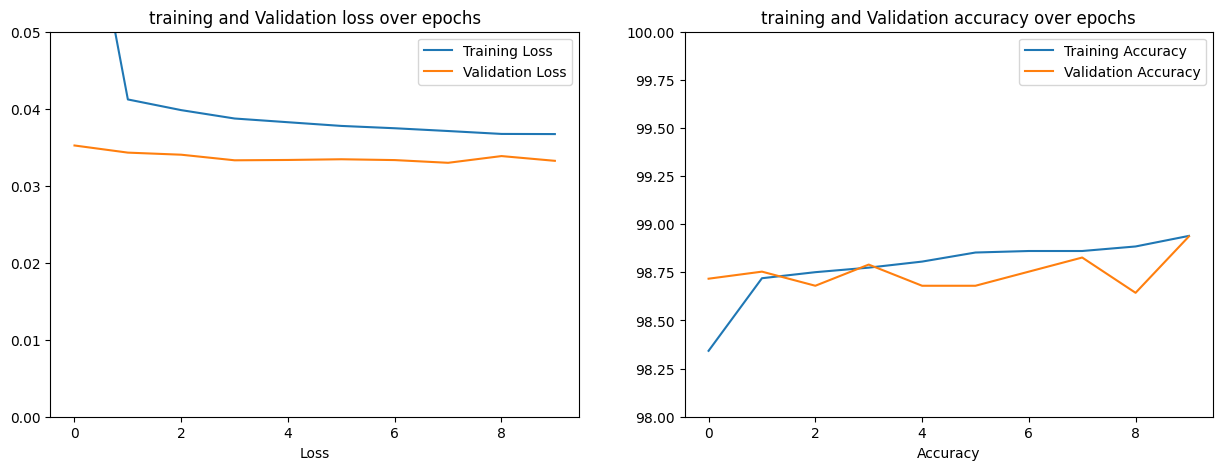

In [ ]:
# viz
plt.figure(figsize=(15,5))
fig, axis = plt.subplots(nrows  = 1, ncols = 2, figsize = (15,5))
axis[0].plot(train_losses, label = "Training Loss")
axis[0].plot(val_losses, label = "Validation Loss")
axis[0].set_title("training and Validation loss over epochs")
axis[0].set_xlabel("Epochs")
axis[0].set_xlabel("Loss")
axis[0].set_ylim([0,0.05])
axis[0].legend()

axis[1].plot(train_accs, label = "Training Accuracy")
axis[1].plot(val_accs, label = "Validation Accuracy")
axis[1].set_title("training and Validation accuracy over epochs")
axis[1].set_xlabel("Epochs")
axis[1].set_xlabel("Accuracy")
axis[1].set_ylim([98,100])
axis[1].legend()

In [ ]:
def predict_sample(sample, model, scaler, device):
    """
    Predict the class for a single sample.

    Args:
        sample (list or array): Feature values in the same order as the training data.
        model (nn.Module): Trained PyTorch model.
        scaler (StandardScaler): Fitted scaler used during preprocessing.
        device (torch.device): Device to run inference on.

    Returns:
        predicted_class (int): 0 or 1 based on the probability threshold of 0.5.
        probability (float): Model's predicted probability for class 1.
    """
    # Convert sample to array and reshape to (1, n_features)
    #sample = np.array(sample).reshape(1, -1)
    # Scale the sample using the same scaler as training
    sample_scaled = scaler.transform(sample)
    sample_tensor = torch.tensor(sample_scaled, dtype=torch.float32).to(device)

    model.eval()
    with torch.no_grad():
        output = model(sample_tensor).squeeze(1)

    probability = output.item()
    predicted_class = 1 if probability > 0.5 else 0
    return predicted_class, probability


In [ ]:
data_df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [ ]:
features.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation'],
      dtype='object')

In [ ]:
# Example: Inference on a new sample
# Replace these values with the actual feature values in the original order.
# Note: The following sample is based on original (unscaled) values.

sample_features = [[2872, 74.691881, 51.400454, 0.725553, 3015, 60.471018, 0.713009, 208.317, 0.831658, 1.45313]] # Corrected "aspectRatio" value
X_new_df = pd.DataFrame(sample_features, columns=features.columns)

predicted_class, probability = predict_sample(X_new_df, model, scaler, device)
print("Predicted Class:", predicted_class, "with probability:", probability)

Predicted Class: 1 with probability: 0.9999268054962158
